In [ ]:
Flask Request object

In the Client-Server Architecture, The Request Object contains all the data that is sent from the client to the server.

1) Form- It is the dictionary method which contains key-value pair of form parameters and their values.
2) args- It is parsed from the URL. It is part of URL which is specified in the URL after Question Mark(?).
3) Cookies- It is the dictionary object cookies names and the values. It is saved at the client-side to track the user session.
4) Files- It contains the data related to the uploaded file.
5) Method- It is the current request method(GET or POST).

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>Customer Login</title>
    </head>
    <body>
        <h1>Customer Login</h1>
        <p><strong>Thanks for the Registration. Confirm your details</strong></p>
        <table border="1">
            {% for key,value in result.items()%}
            <tr>
                <th>{{key}}</th>
                <td>{{value}}</td>
            </tr>
            {% endfor %}
        </table>
    </body>
</html>

save this file in Customer_Login.html

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>Customer</title>
    </head>
    <body>
        <h1>Register your Details</h1>
        <form action="http://localhost:5002/customer" method="POST">
            <p>Name<input type="text" name="name"/></p>
            <p>Age<input type="text" name="age"/></p>
            <p>Email<input type="email" name="email"/></p>
            <p>Contact<input type="text" name="contact"/></p>
            <p><input type="submit" value="submit"/></p>
        </form>
    </body>
</html>


Save this file in Customer_details.html

In [6]:
from flask import Flask, render_template, request
app = Flask(__name__)
@app.route('/')
def Customer_details():
    return render_template('Customer_details.html')
@app.route('/success', methods=['POST', 'GET'])
def Customer_Login():
    if request.method == 'POST':
        result = request.form
        return render_template('Customer_Login.html', result=result) 
    return render_template('Customer_details.html')
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


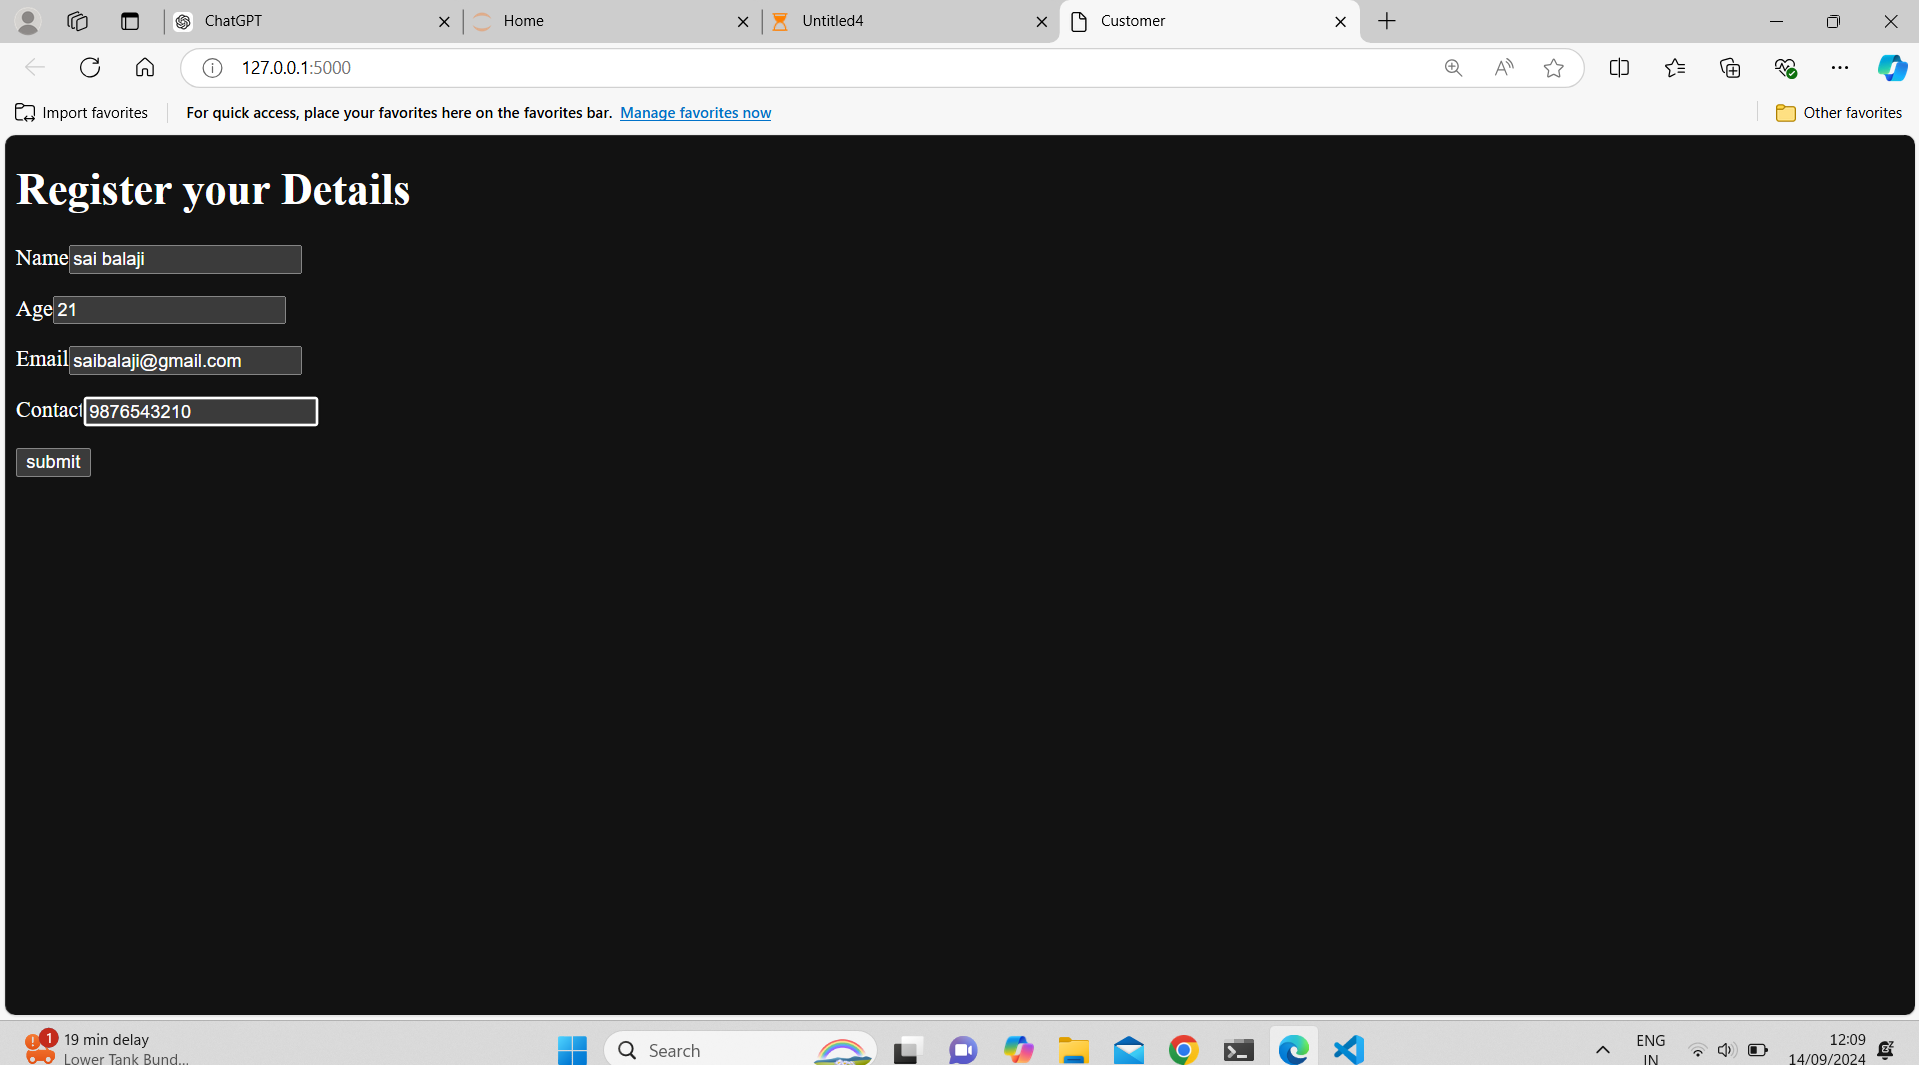

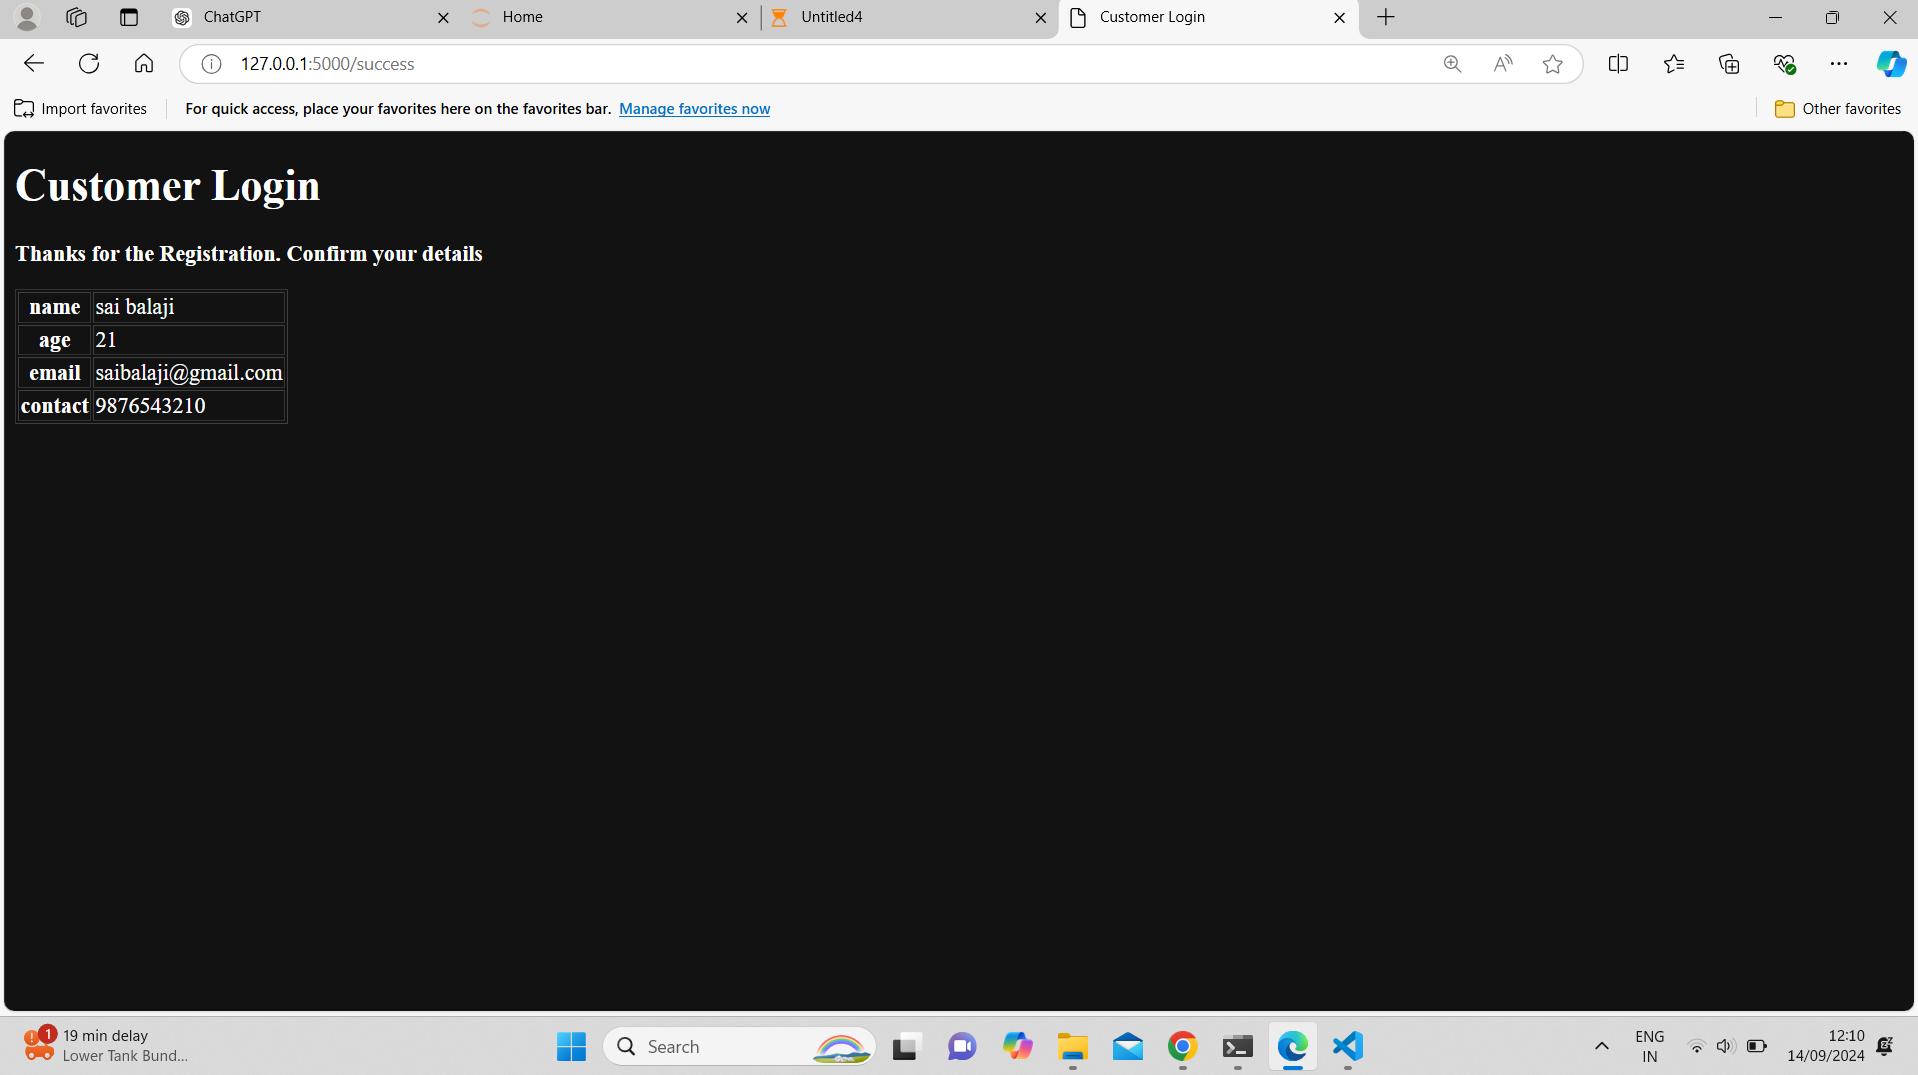

In [7]:
from IPython.display import Image, display
a=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 121003.png"
b=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 121023.png"
display(Image(filename=a))
display(Image(filename=b))

In [ ]:
Flask Cookies

Cookies are stored in the form of text files on the clients machine. cookies are used to track the users activities on the web and
reflect some suggestions according to the users choices to enhance the users experience.

response.setCookie(<title>,<content>,<expiry time>

In [9]:
from flask import *
app=Flask(__name__)
@app.route('/cookie')
def cookie():
    a=make_response("<h1>Cookie is Set</h1>")
    a.set_cookie('foo','bar')
    return a
if __name__=='__main__':
    app.run(port=5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
127.0.0.1 - - [14/Sep/2024 12:36:08] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [14/Sep/2024 12:36:16] "GET /cookie HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 12:38:06] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [14/Sep/2024 12:38:17] "GET /cookie HTTP/1.1" 200 -


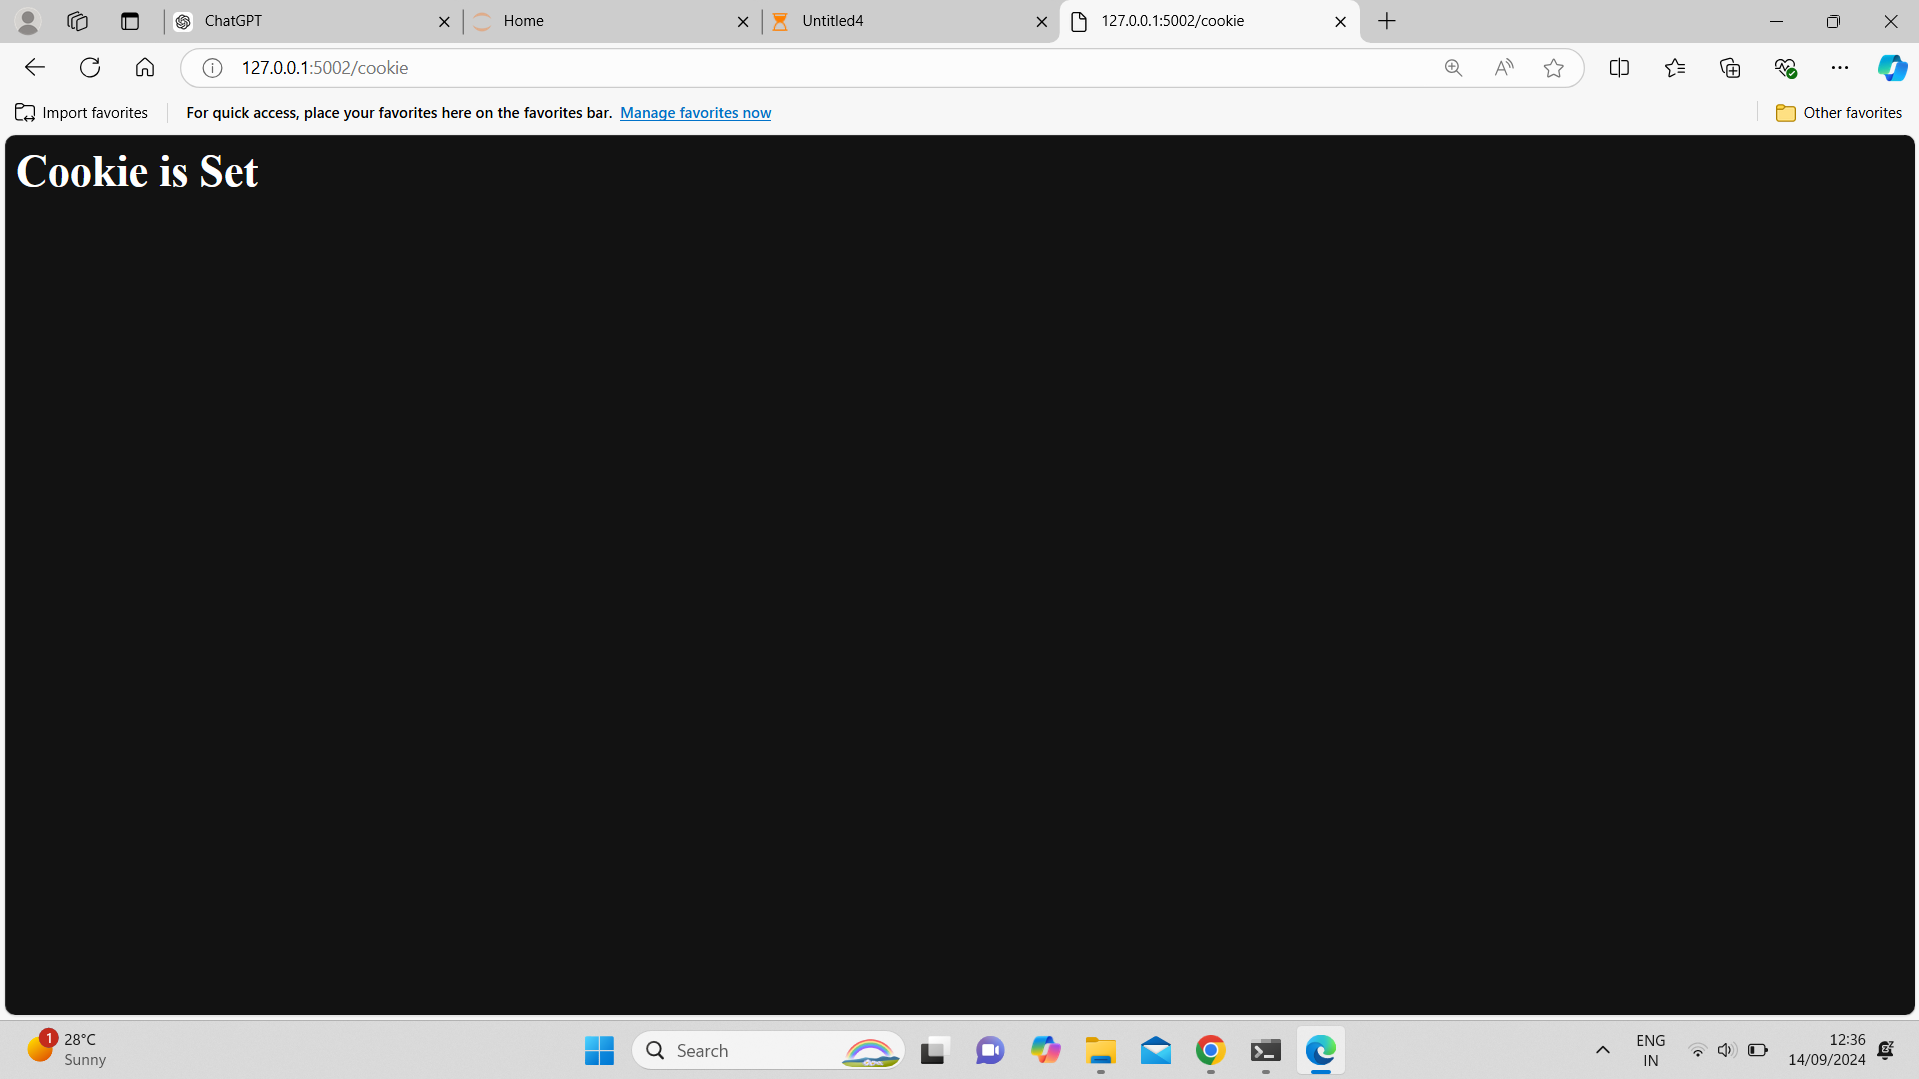

In [10]:
from IPython.display import Image,display
a=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 123628.png"
display(Image(filename=a))

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Login</title>
</head>
<body>
    <h1>Login Page</h1>
    <form method="POST" action="/success">
        <table>
            <tr><td>Name</td><td><input type='name' name='name' required/></td></tr>
            <tr><td>Email</td><td><input type='email' name="email" required/></td></tr>
            <tr><td>Password</td><td><input type="password" name="password" required/></td></tr>
            <tr><td><input type='submit' value="Submit"/></td></tr>
        </table>
    </form>
</body>
</html>
login.html

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Success</title>
</head>
<body>
    <h1>Login Successful..</h1>
    <a href="/viewprofile">View Profile</a>
</body>
</html>

success.html

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>Profile</title>
    </head>
    <body>
        <h3>Hi {{name}}</h3>
    </body>
</html>

profile.html

In [31]:
from flask import *
app=Flask(__name__)
@app.route('/error')
def error():
    return '<p><strong>Enter Correct Password</strong></p>'
@app.route('/')
def login():
    return render_template('login.html')
@app.route('/success',methods=['POST'])
def success():
    name=request.form['name']
    email=request.form['email']
    password=request.form['password']
    if password=='balaji':
        a=make_response(render_template('success.html'))
        a.set_cookie('name',name)
        return a
@app.route('/viewprofile')
def profile():
    name=request.cookies.get('name')
    a=make_response(render_template('profile.html',name=name))
    return a
if __name__=='__main__':
    app.run(port=5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
127.0.0.1 - - [14/Sep/2024 15:41:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:42:03] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:42:05] "GET /viewprofile HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:42:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:43:05] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:43:06] "GET /viewprofile HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:46:46] "POST /success HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 15:46:59] "GET /viewprofile HTTP/1.1" 200 -


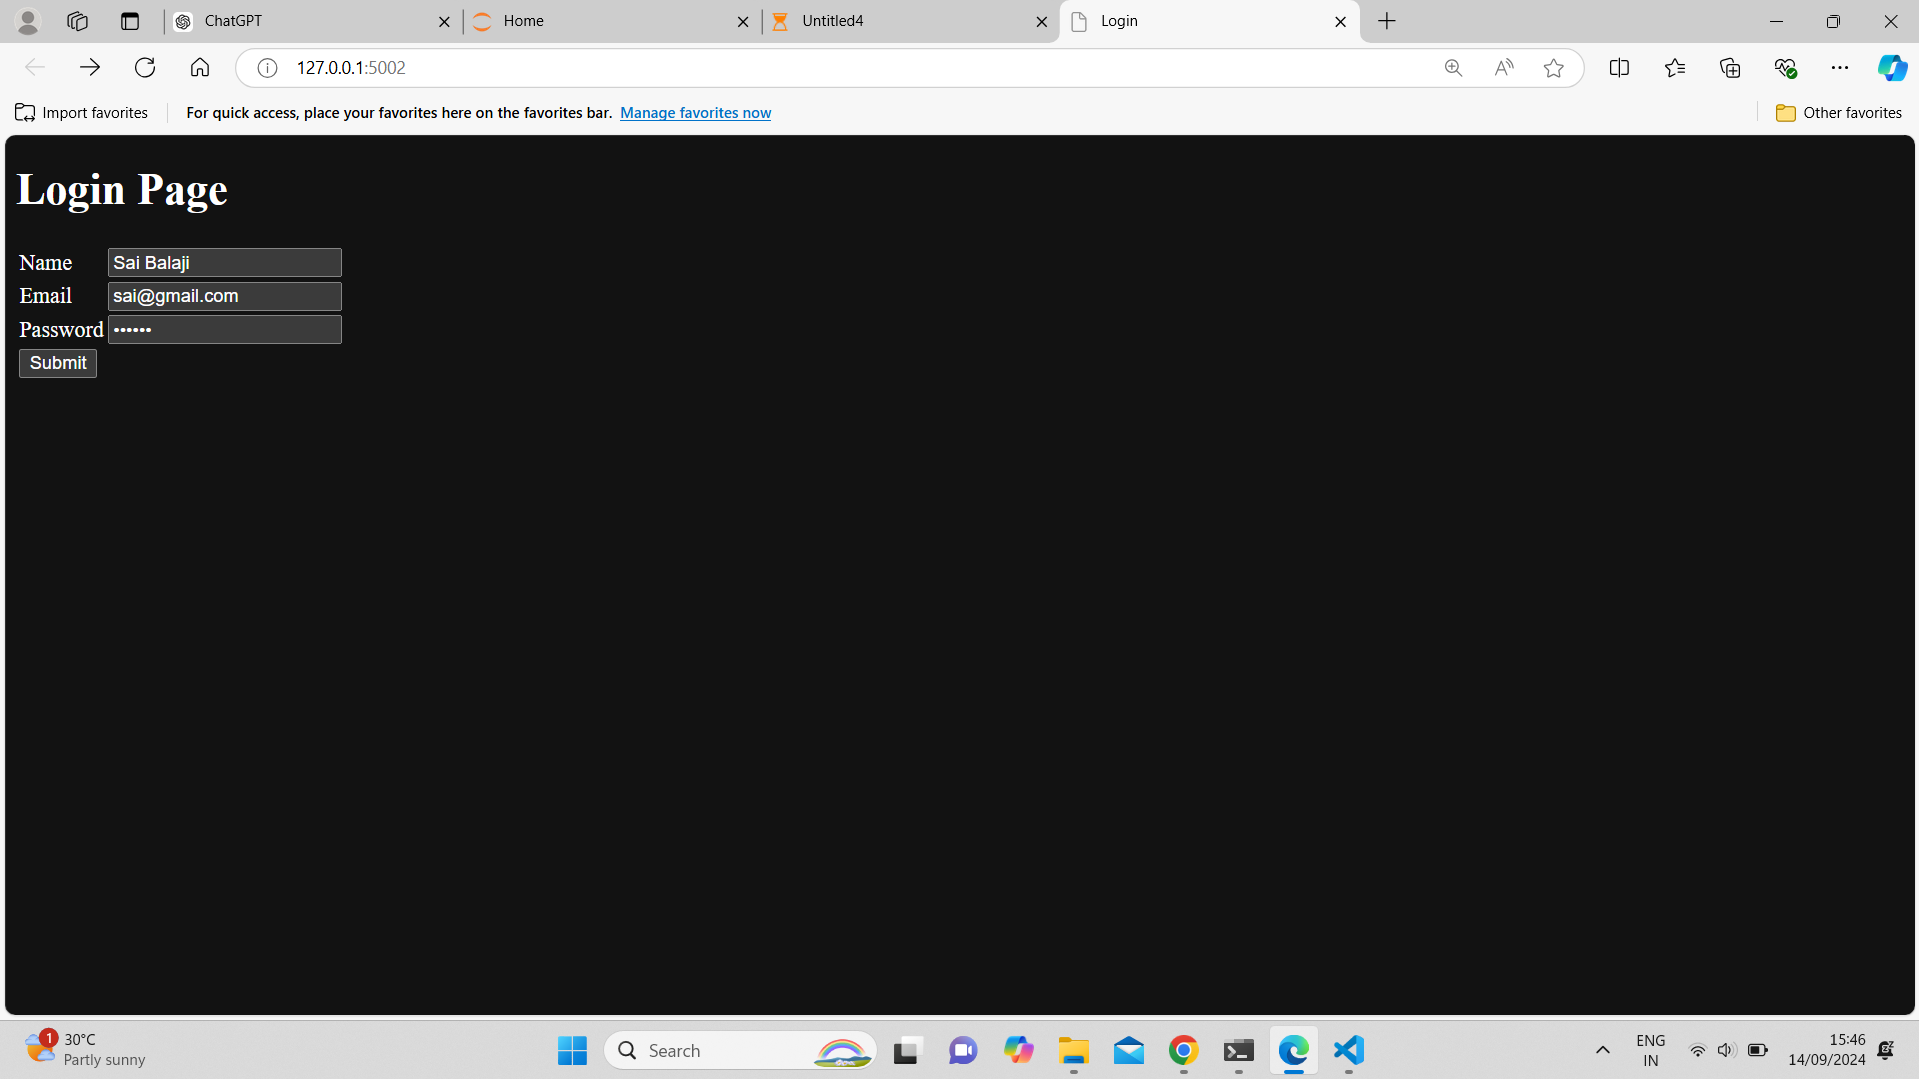

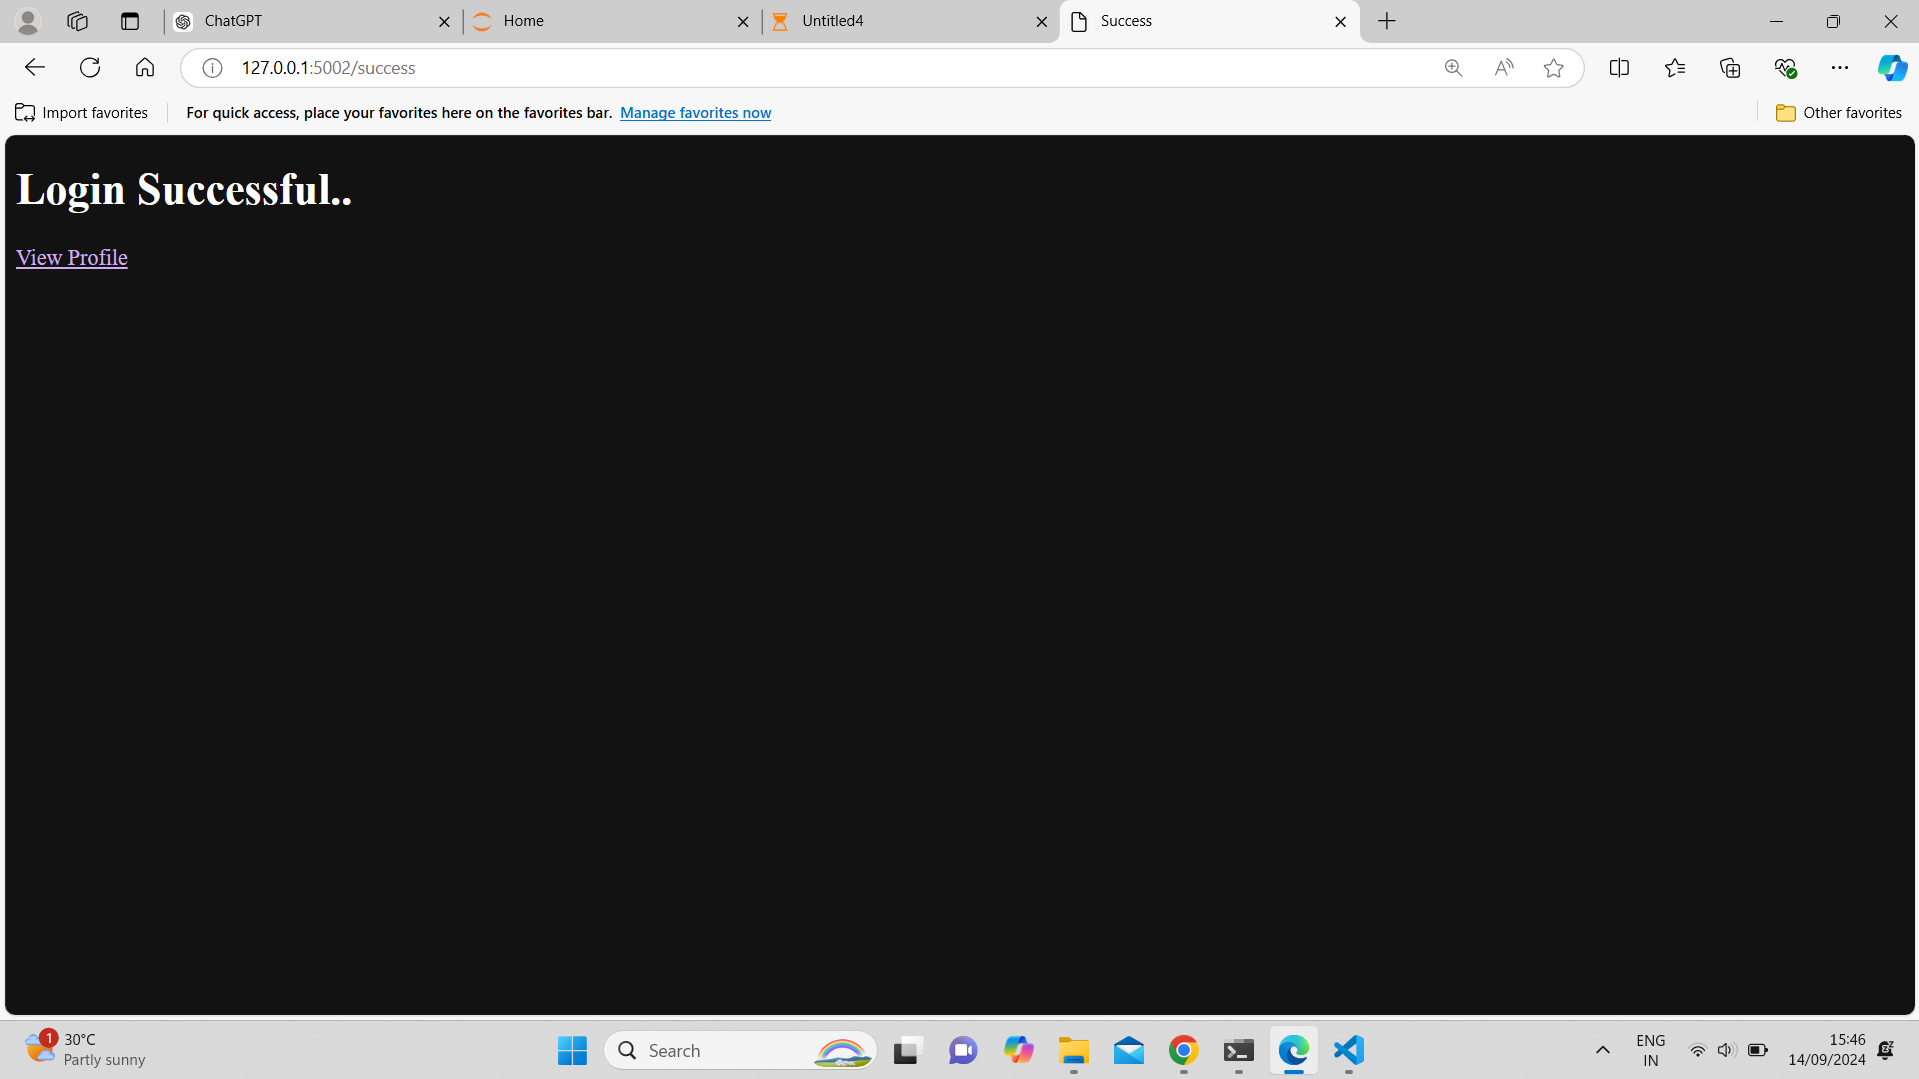

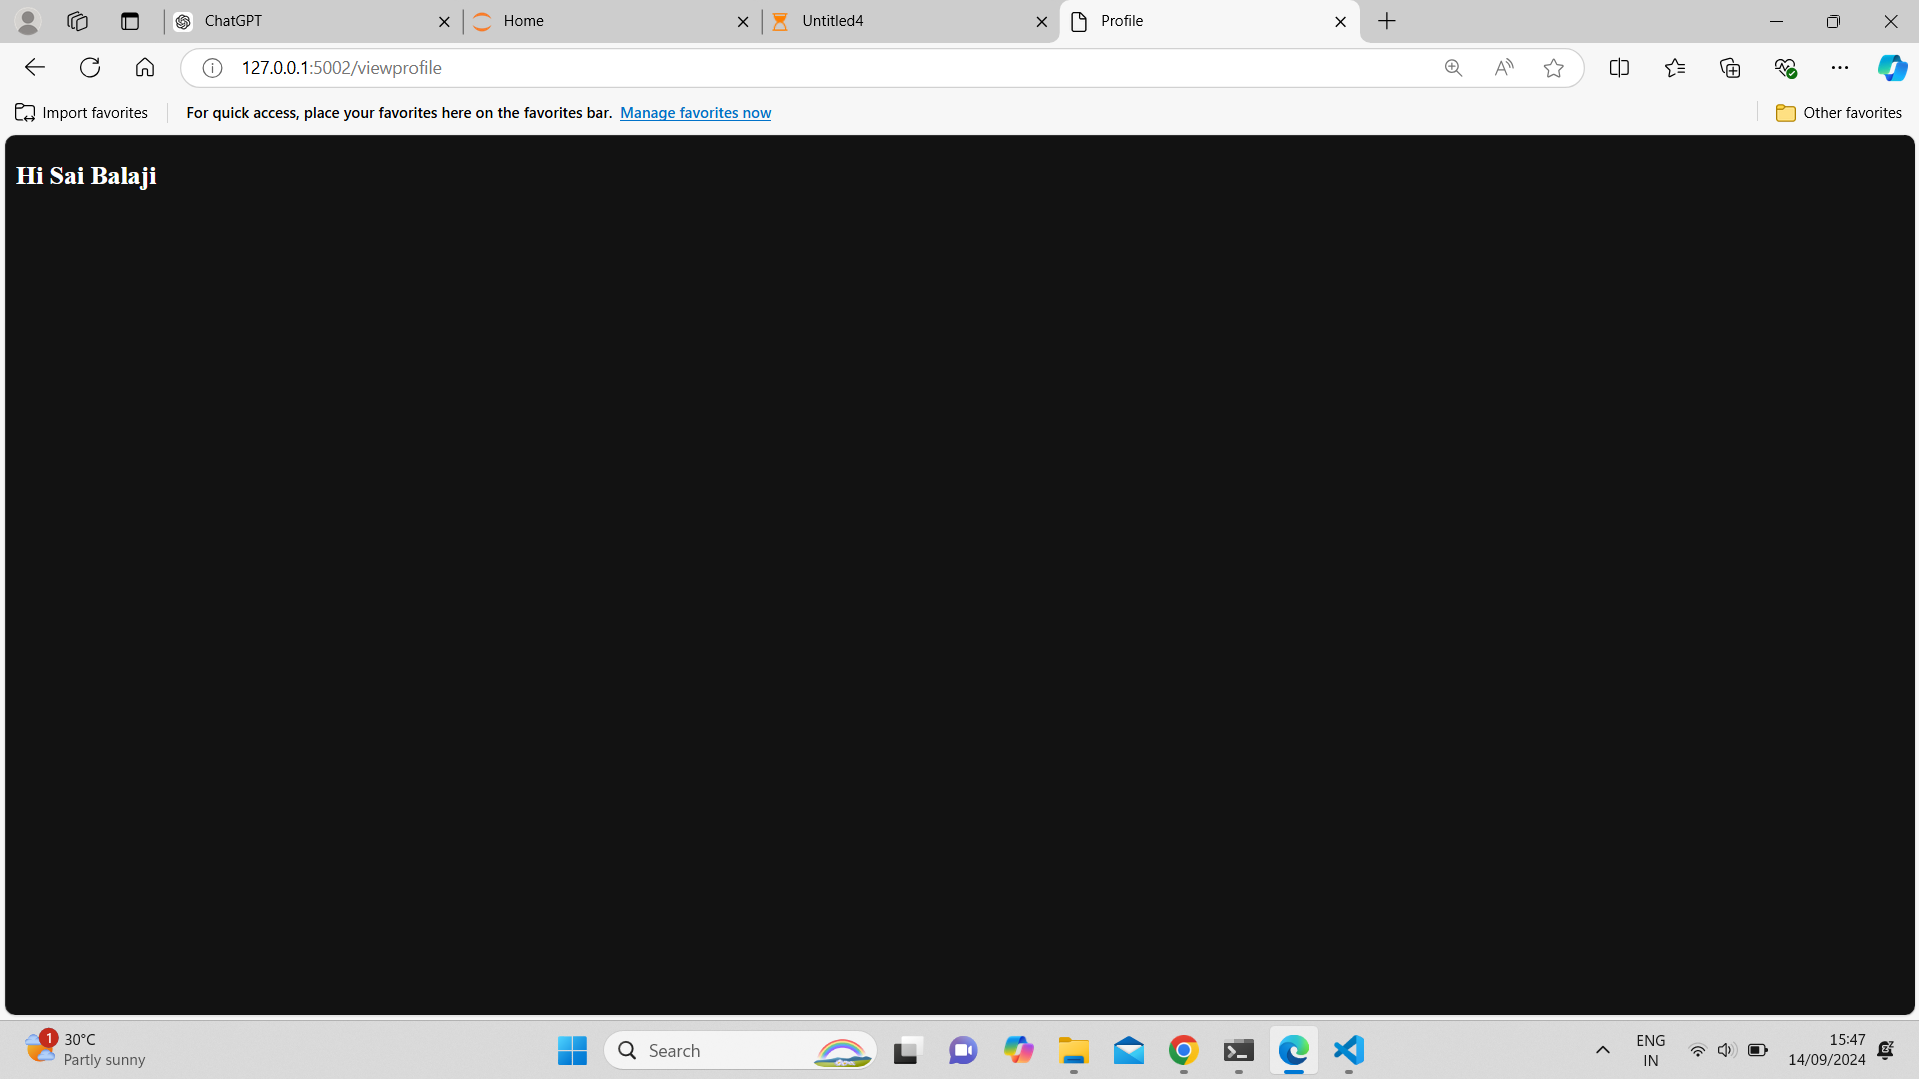

In [32]:
from IPython.display import Image,display
a=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 154640.png"
b=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 154655.png"
c=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 154707.png"
display(Image(filename=a))
display(Image(filename=b))
display(Image(filename=c))

In [ ]:
Flask Session

Here Flask Session is very much similar to the cookies. However Session data is stored on the Server.

The following syntax is used to set the session variable to a specific value on the server.

Session[<variable-name>] = <value>  

To remove a session variable, use the pop() method on the session object and mention the variable to be removed.

session.pop(<variable-name>, none)  

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>home</title>
    </head>
    <body>
        <h1>Welcome to Flask Website</h1>
        <a href="/login">login</a><br>
        <a href="/success">success</a><br>
        <a href="/logout">logout</a><br>
    </body>
</html>
home.html

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Login</title>
</head>
<body>
    <h1>Login Page</h1>
    <form method="POST" action="/success2">
        <table>
            <tr><td>Name</td><td><input type='name' name='name' required/></td></tr>
            <tr><td>Email</td><td><input type='email' name="email" required/></td></tr>
            <tr><td>Password</td><td><input type="password" name="password" required/></td></tr>
            <tr><td><input type='submit' value="Submit"/></td></tr>
        </table>
    </form>
</body>
</html>
login.html

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Success</title>
</head>
<body>
    <h1>Login Successful..</h1>
    <a href="/profile">View Profile</a>
    <a href="/logout">Logout</a>
</body>
</html>
success2.html

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Logout</title>
</head>
<body>
    <h1>Logged Out Successfully</h1>
    <a href="/">Home</a>
</body>
</html>
logout.html

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>Profile</title>
    </head>
    <body>
        <h3>Hi {{name}}</h3>
    </body>
</html>
profile.html

In [47]:
from flask import *
app=Flask(__name__)
app.secret_key='balaji'
@app.route('/')
def home():
    return render_template('home.html')

@app.route('/login')
def login():
    return render_template('login.html')
@app.route('/success2',methods=['POST'])
def success2():
    session['name']=request.form['name']
    return render_template('success2.html')
@app.route('/logout')
def logout():
    if 'name' in session:
        session.pop('name',None)
        return render_template('logout.html')
    else:
        return '<p>user already logged out</p>'
@app.route('/logout')
@app.route('/profile')
def profile():
    if 'name' in session:
        name=session['name']
        return render_template('profile.html',name=name)
    else:
        return '<p>Please Login again</p>'
if __name__=='__main__':
    app.run(port=5004)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5004
Press CTRL+C to quit


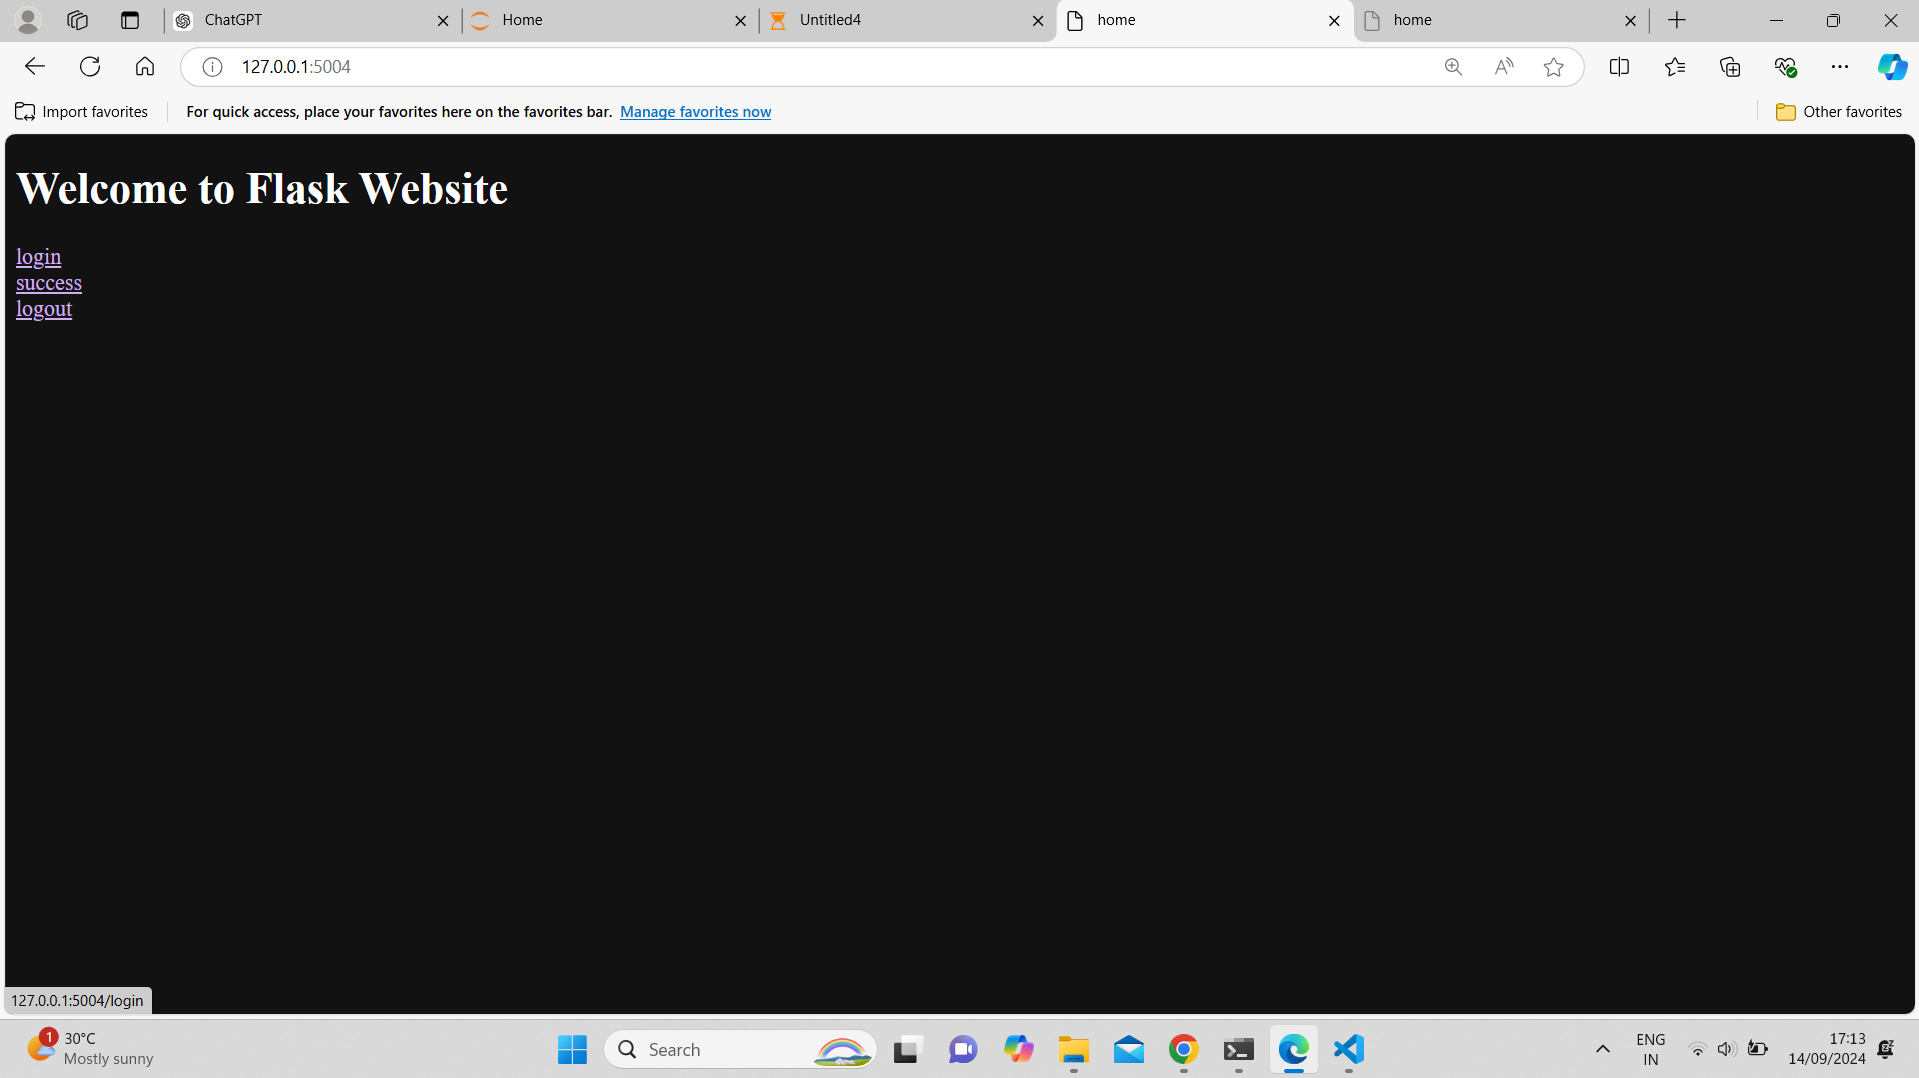

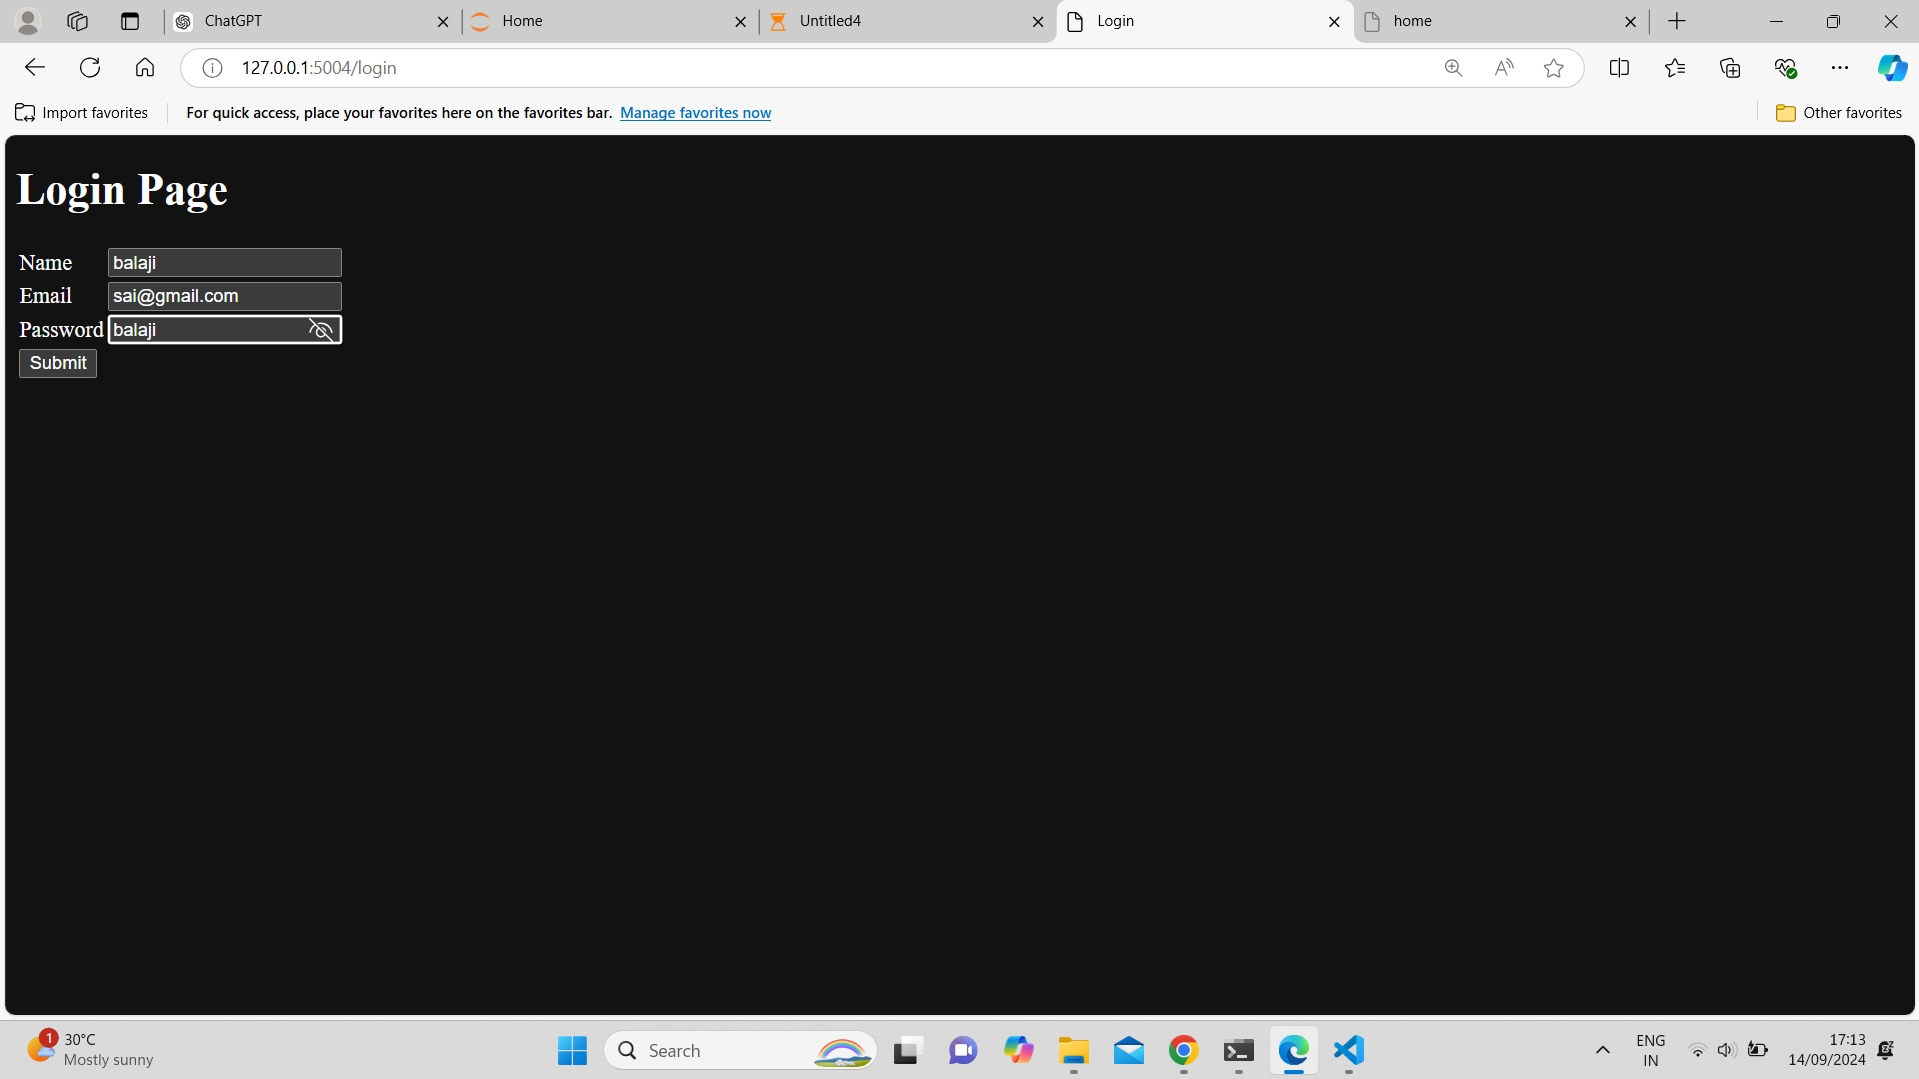

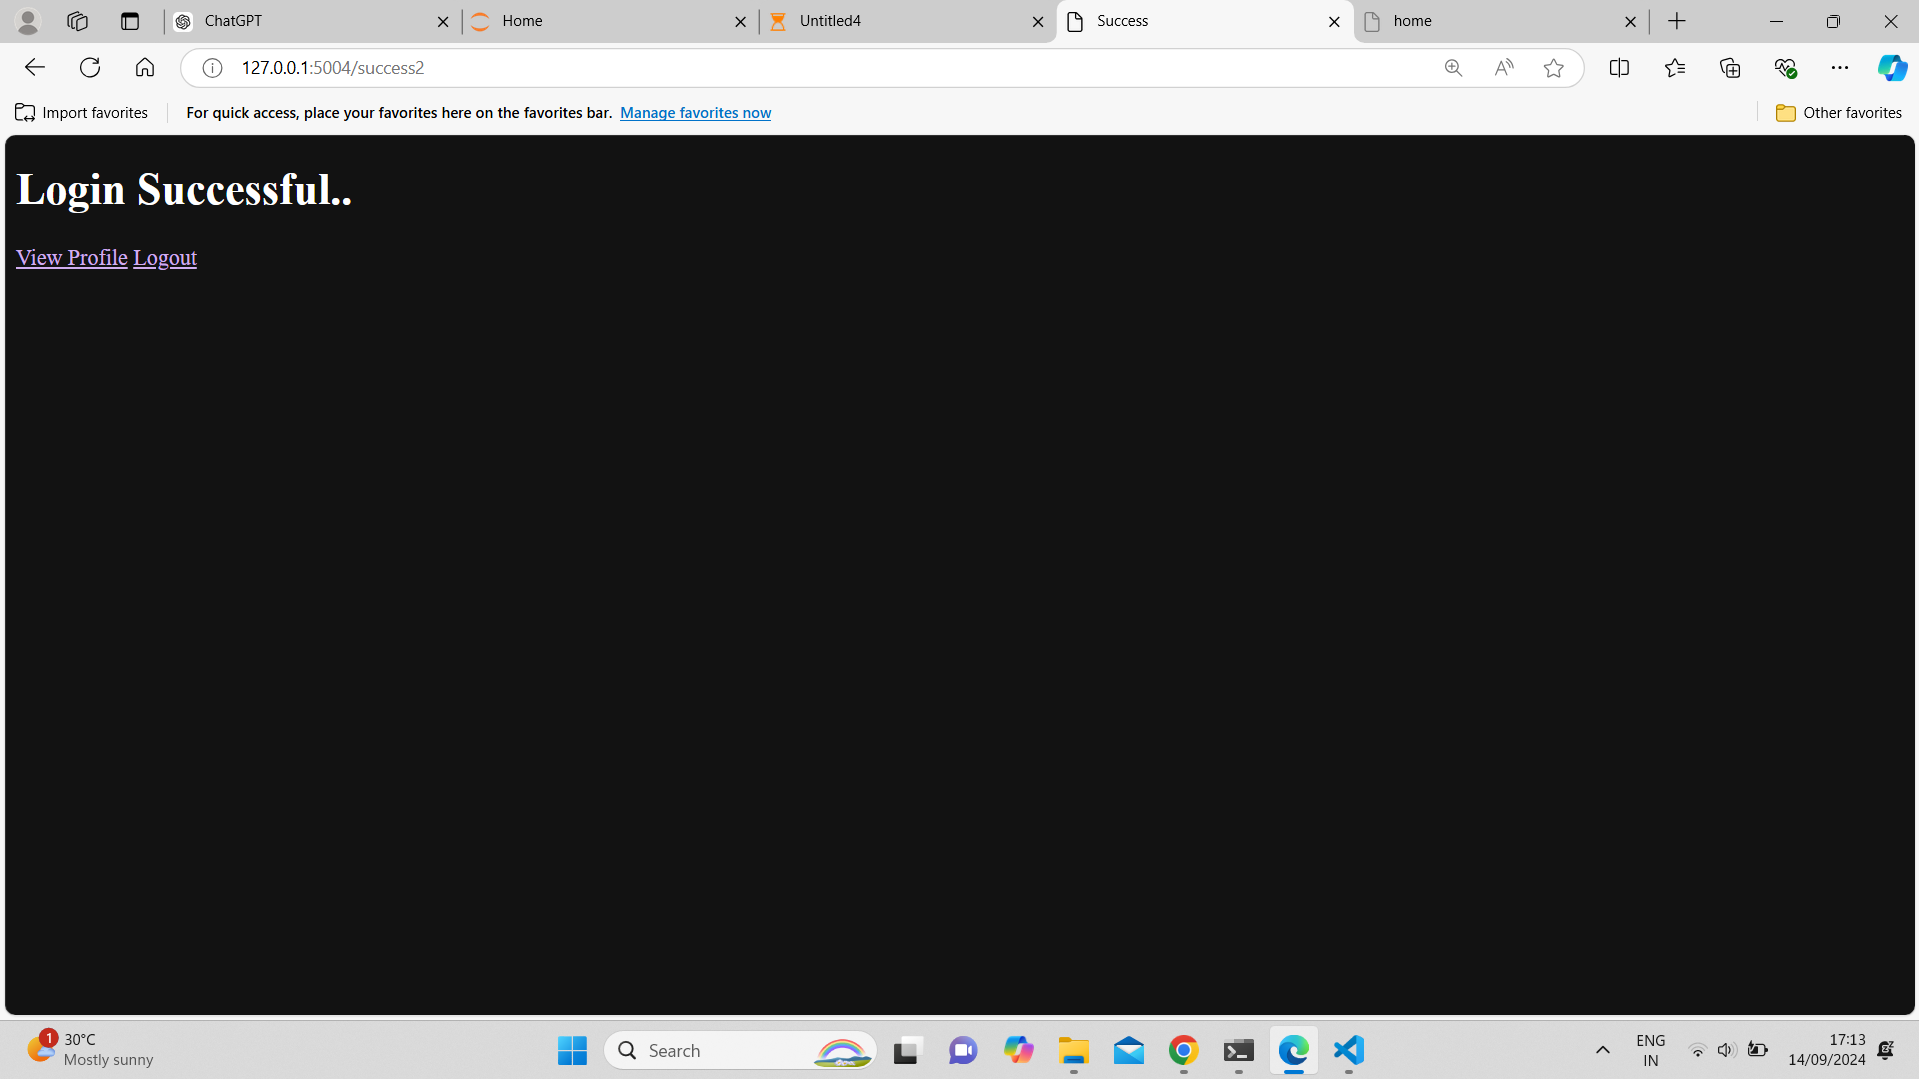

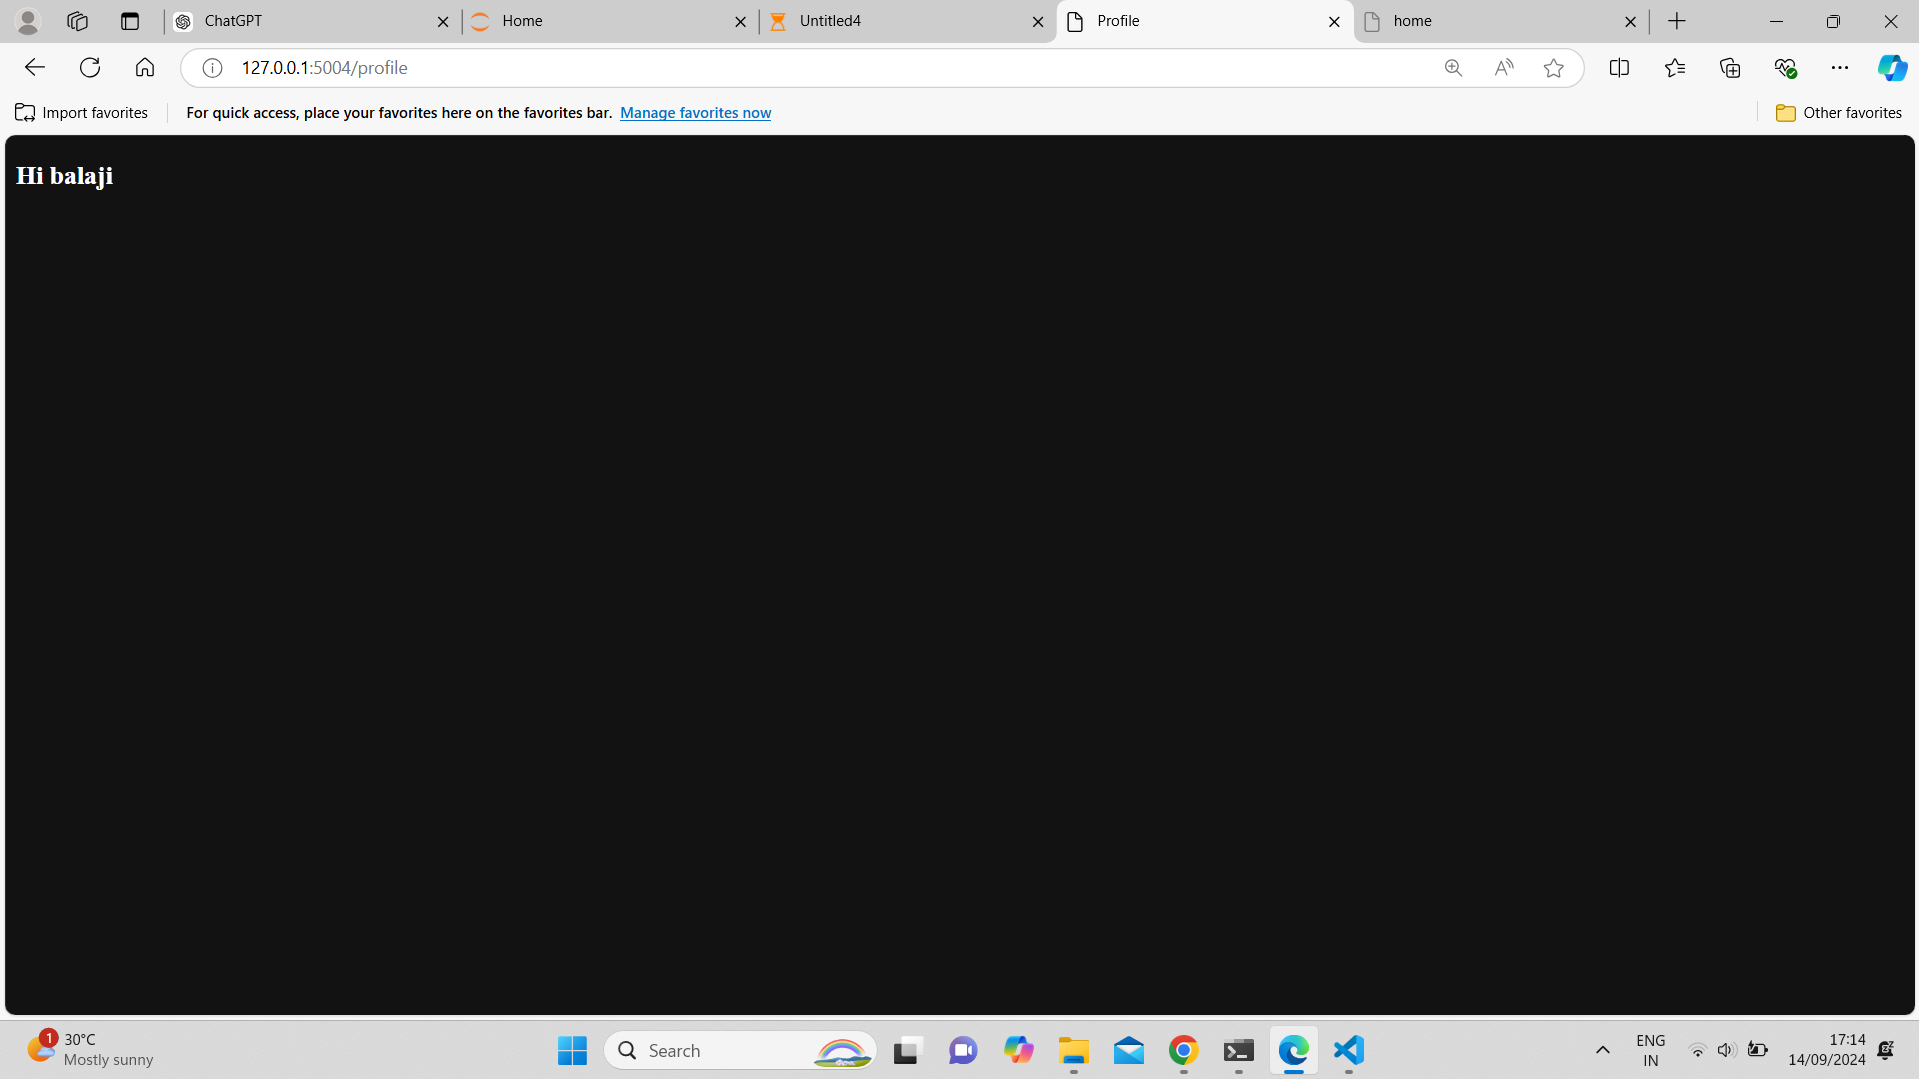

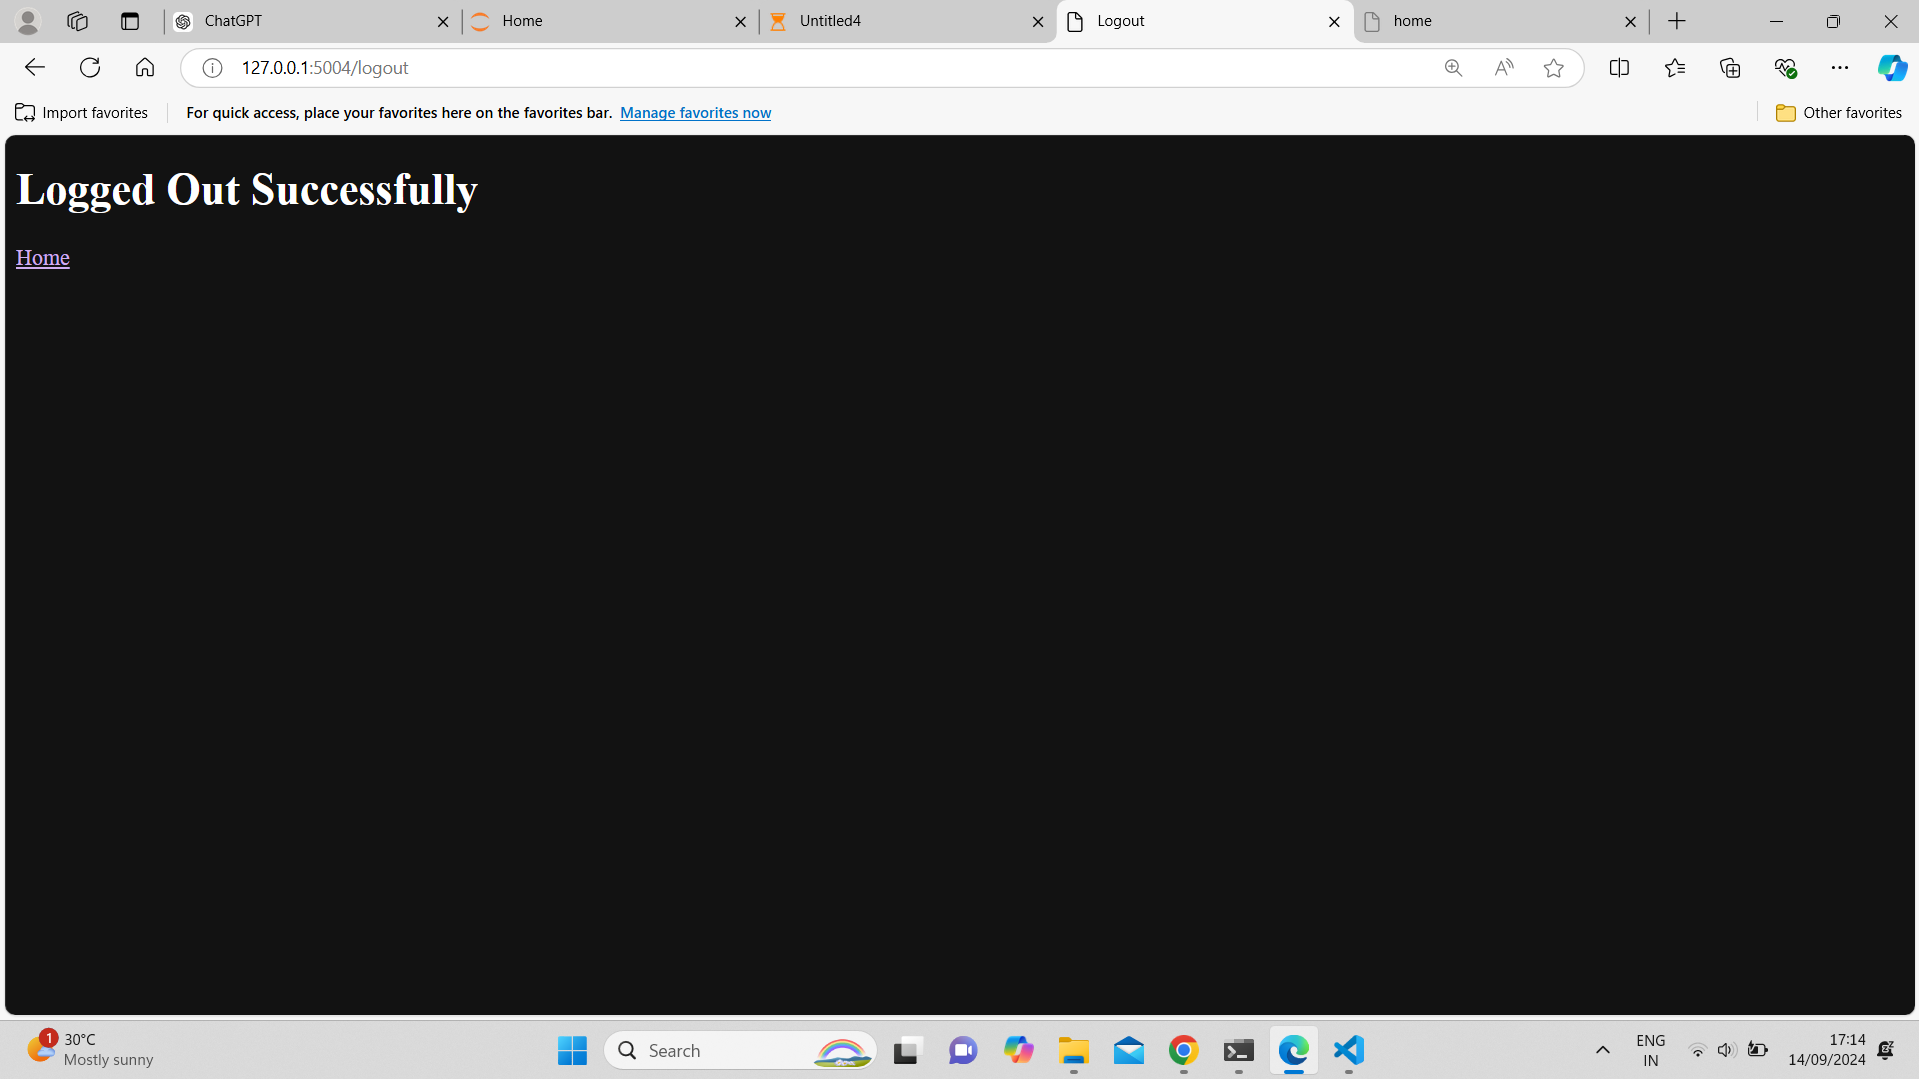

In [43]:
from IPython.display import Image,display
a=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 171314.png"
b=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 171351.png"
c=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 171403.png"
d=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 171414.png"
e=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 171429.png"
display(Image(filename=a))
display(Image(filename=b))
display(Image(filename=c))
display(Image(filename=d))
display(Image(filename=e))

In [ ]:
Flask File Uploading

File uploading is the process of transmitting the binary or normal files into the server. Flask facilitates us to upload the files easily.
The uploaded file is saved to the temporary directory of the server for a while before it is saved to some desired location. 
The name of the destination file can be obtained using the following syntax.

name = request.files['file'].filename  
However, we can mention the path of the folder where the file is to be uploaded to the server and the maximum size of the uploaded file. 
This all can be done in the configuration settings of the flask object.

app.config['UPLOAD_FOLDER'] - It is used to mention the upload folder.

app.config['MAX_CONTENT-PATH'] - It is used to mention the maximum size of the file to be uploaded.

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>upload</title>
    </head>
    <body>
        <form action="/fail" method="post" enctype="multipart/form-data">
            <input type='file' name="file"/>
            <input type='submit' value="upload"/>
        </form>
    </body>
</html>

upload.html

In [ ]:
<!DOCTYPE html>
<html>
    <head>
        <title>Suceess</title>
    </head>
    <body>
        <p>file uploaded successfully</p>
        <p> filename : {{name}}</p>
    </body>
</html>
fail.html

In [52]:
from flask import *
app=Flask(__name__)
@app.route('/')
def upload():
    return render_template('upload.html')
@app.route('/fail',methods=['POST'])
def fail():
    if request.method=='POST':
        abc=request.files['file']
        abc.save(abc.filename)
        return render_template('fail.html',name=abc.filename)
if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [14/Sep/2024 18:28:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 18:29:07] "POST /fail HTTP/1.1" 200 -
127.0.0.1 - - [14/Sep/2024 18:29:54] "POST /fail HTTP/1.1" 200 -


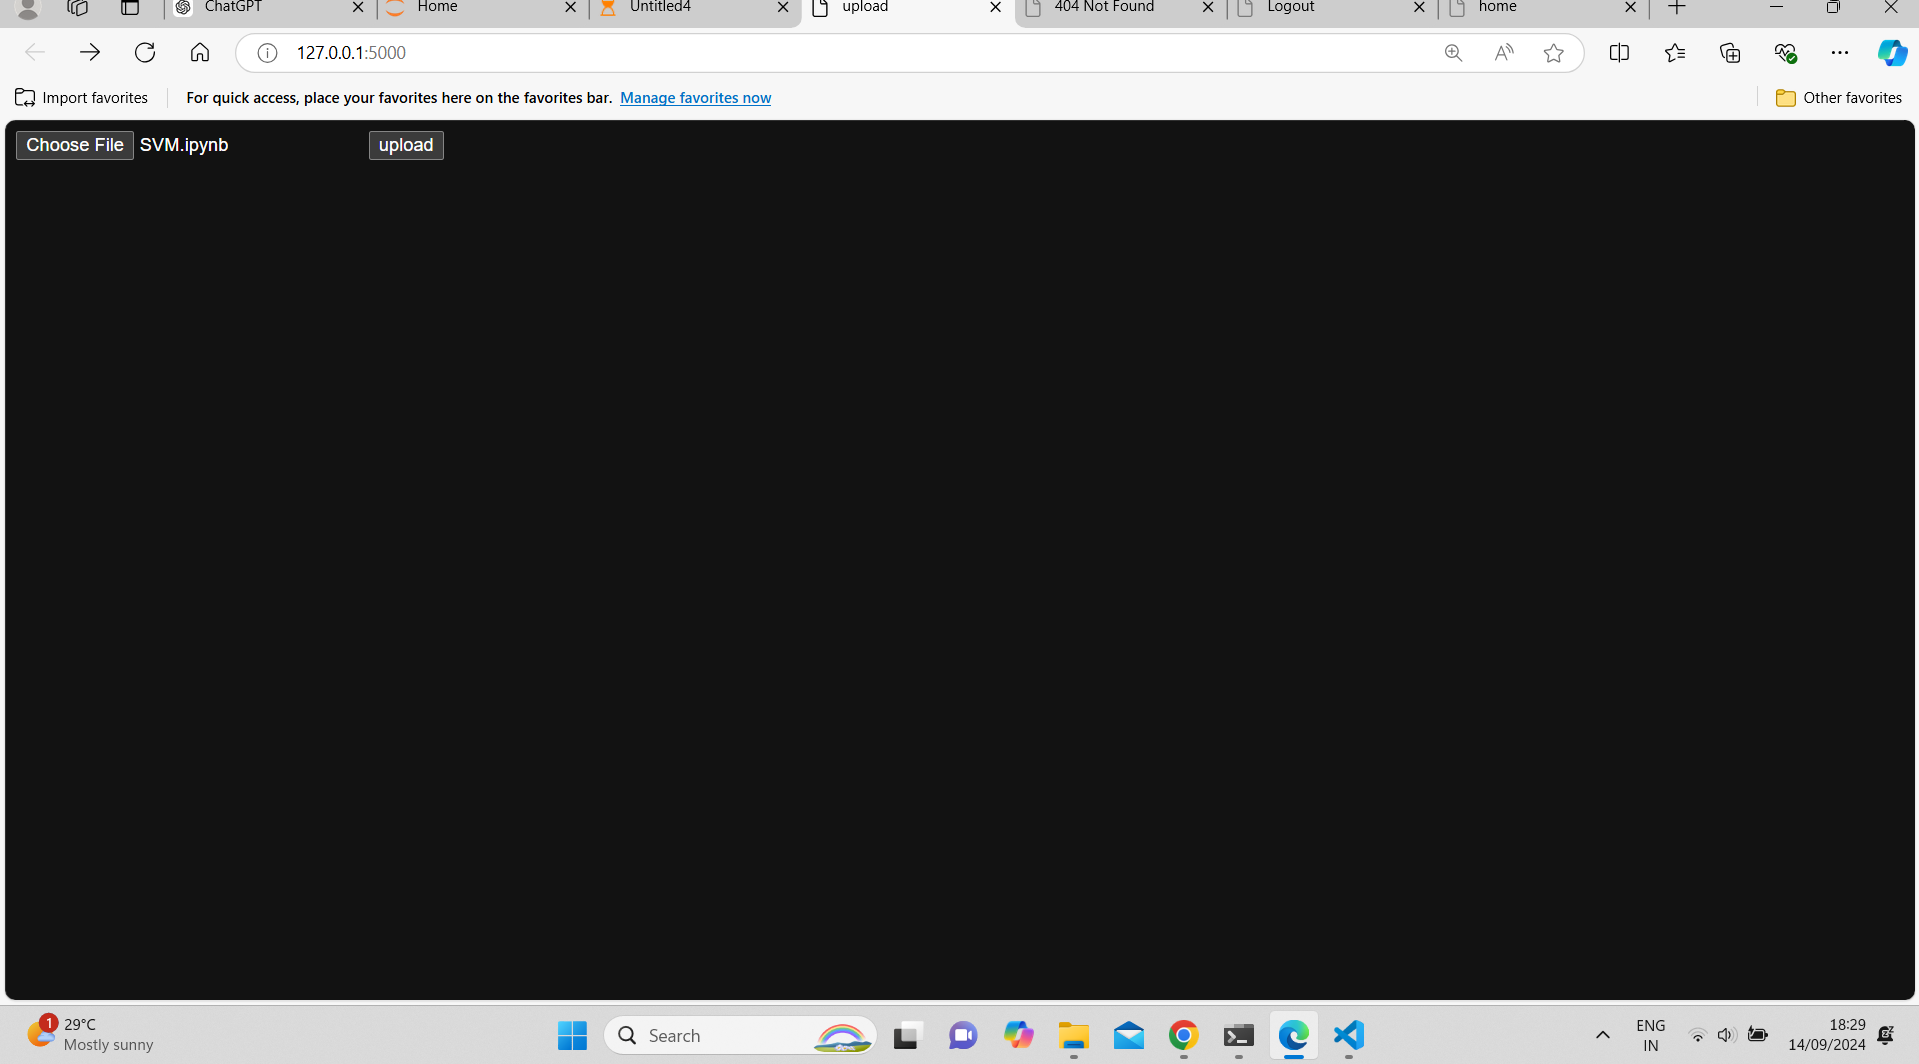

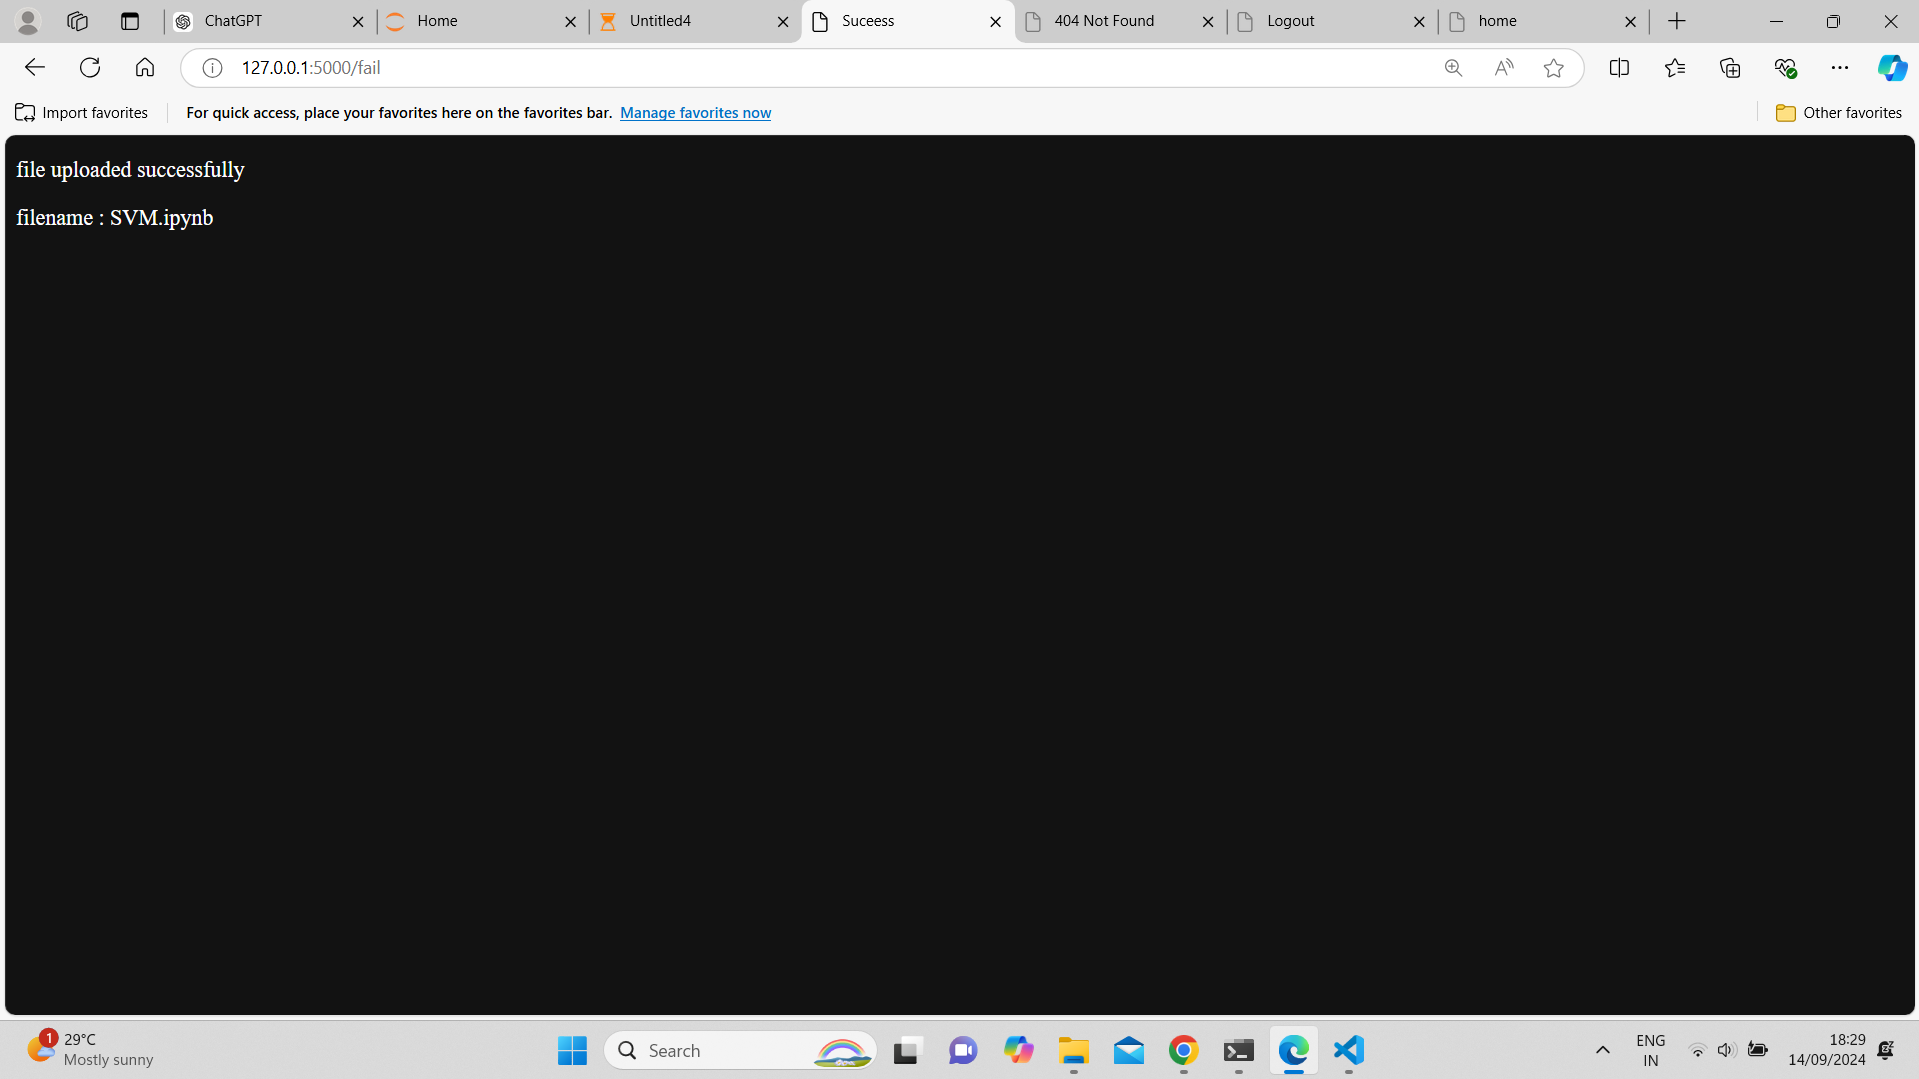

In [53]:
from IPython.display import Image, display
a=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 182949.png"
b=r"C:\Users\PythonTeam\Desktop\BALAJI\Screenshot 2024-09-14 182959.png"
display(Image(filename=a))
display(Image(filename=b))